### 나이브 베이즈 분류기

In [2]:
from scipy import sparse
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib 
import scipy as sp
import matplotlib.pyplot as plt
import IPython
import sklearn
import mglearn
from sklearn.model_selection import train_test_split

In [1]:
#나이브 베이즈 분류기

#Naive Bayes 앞의 선형 모델과 유사함. LR(선형회귀) 나 LinearSVC 선형 분류기보다는 훈련 속도가 빠르지만,
#일반화 성능이 조금은 뒤쳐짐.

#나이브 베이즈 장점
#각 특성을 개별로 취급해 파라미터를 학습하고, 각 특성에서 클래스 별 통계를 단순하게 취합하기 떄문임.
#Sklearn 분류기는 1. GaussianNB, BernoullinNB, MultinominalNB 3가지임.

#가우시안 -> 연속적인 어떤 데이터에도 적용 가능
#베눌린NB는 -> 이진 데이터
#멀티노미널NB -> 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트) -> 예를 들면 문장에 나타난 단어의 횟수.
#버눌린과 멀티노미널은 대부분 텍스트 데이터 분류에 사용됨.

#BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개 인지 셈.

In [10]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0],
             ])
y = np.array([0, 1, 0, 1])

In [11]:
X

array([[0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 0, 1, 0]])

In [12]:
#이진 특성을 4개 가진 데이터 포인트 4개가 존재. 클래스는 0과 1 두 개임.
#y의 클래스가 0인 경우(1,3번째) / 첫번째 특성은 0이 두 번임. 0이 아닌것이 한 번도 없음.
#두번째 특성은 0 이 한 번이고, 1도 한번임. 같은 방식으로 두 번째 ㅋ르래스에 해당하는 데이터 포엔트에 대해서도 계산
#클래스별로 0이 아닌 원소를 세는 과정을 요약

In [13]:
counts = {}
for label in np.unique(y):
    #각 클래스에 대해 반복
    #특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트 : \n", counts)

특성 카운트 : 
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [14]:
#mULTIONOMIAL NB는 클래스별로 특성의 평균을 계산.
#GaussianNB는 클래스 별로 각 특성의 표준편차와 평균을 저장함.
#가우시안은 예측할 때 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 함.
#나이브 베이즈 모델의 coef_는 기울기 w가 아니라서, 선형 모델과는 의미가다르다.

In [16]:
#장단점과 매개변수

#MultionominalNB와 BernoulliNB 는 모델의 복잡도를 조절하는 alpha 매개 변수 하나를 가지고 있음
#alpha가 주어지면, 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가함.
#통계 데이터를 완만하게 만듦, alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다.
#alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않음.
#그러나, 이 값을 조정하면 어느 정도 정확도를 높일 수 있음.

#GaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 
#다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터 카운트를 사용
#multionomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋(큰 문서들) 에서 BernoulliNB보다 성능이 높음

#나이브벵지ㅡ 모델과 선형모델의 장단점은 비슷함, 훈련과 예측 속도가 빠르며 훈련과정을 이해하기 쉬움
#희소한 고차원 데이터에서 잘 작동하며, 비교적 매개변수에 민감하지 않음.

#### 결정 트리

In [17]:
#분류와 회귀 문제에 널리 사용되는 디시전 트리
#질문형식(스무고개) 매/펭귄을 구분하기 위해서, 날 수 있는가 없는가로 분류 <->

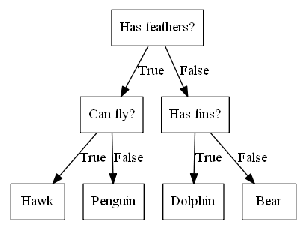

In [18]:
mglearn.plots.plot_animal_tree()

In [19]:
#DT의 마지막 노드는 leaf 라고도 함.
#에지는 질문의 답과 다음 질문을 연결함

In [20]:
#DT 트리 알고리즘은 가능한 모든 테스트에서 타깃값에 대해 갖아 많은 정보를 가진것을 고름.
#데이터셋을 x[1] = 0.06에서 수평으로 나누는 것이 가장 많은 정보를 포함함.
#즉, 이 직선이 클래스 0에 속한 포인트와 클래스 1에 속한 포인트를 가장 잘 나눔

In [23]:
#맨 첫번째는 root node 
#ex: 데이터가 100개고, 클래스가 2개면 root node는 counts[50,50] 으로 나눔.(구분이 된다면)
#x[1] <= 0.06 에 통과하면 True / False 로 나누어짐

#그래서 해석은 counts = [2,32] / [48, 18] 이면
# 0과 1로 나누는것, 왼쪽은 0인게 2개/ 오른쪽은 왼쪽인게 48개 임

In [24]:
#DT의 반복된 프로세스는 각 노드가 테스트 하나씩을 가진 이진 결정 트리를 만듦.
# 쉽게 말하면, 하나의 축을 따라 데이터를 둘로 나눔.
#한 개의 타깃값(하나의 클래스나 하나의 회귀 분석) 결과를 가질때까지 반복됨. 타깃 하나로만 이뤄진 리프 노드를
#순수 노드라고 부른다.

In [25]:
#새로운 데이터에 대한 예측은 -> 주어진 데이터 포인트가 특성을 분할한 영역들 중 어디에 놓이는지 확인하면 됨.
#회귀 문제에서도 사용 가능
#예측을 하려면, 각 노드의 테스트 결과에 따라 트리를 탐색해나고 새로운 데이터 포인트에 해당하는 리프 노드를 찾음.
#찾은 리프 노드의 훈련 데이터 평균값이 이 데이터 포인트의 출력이 된다.

#### 결정 트리 복잡도 제어

In [26]:
# 모든 리프 노드(마지막)이 순수노드(타깃 하나) 까지는 모델이 복잡해지고, 훈련에 과대적합됨.
#순수 노드 트리는 훈련 세트에 100% 정확하게 맞는 다는 의미임.
#이럴때는, 결정 경계(=클래스 구분짓는 피처의 값들)이, '클래스 포인트들' 이상치 하나에 너무 민감하게 반응함.

In [27]:
#과대적합을 막는 전략은 2가지임.

#1. 사전 가지 치기 와 DF의 데이터 포인트가 적은 노드를 삭제하거나 병합함(=사후 가지치기 또는 가지치기)
#1. 사전은 말 그대로 최대 깊이나 리프의 최대 게수를 제한함.
#또한, 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것임.
#또는 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 것임.

In [28]:
#sklearn 에서 결정 트리는 DecisionTreeRegressor 와 DecisionTreeClassifier에 구현되어 있음

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer


In [39]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
#random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [41]:
#모든 리프 노드가 순수 노드라, 훈련 세트 정확도가 100% 임.
#-> 가지치기를 끝까지 함. 
#결정 트리 깊이를 제한해줘야해, 가지치기 하지 않으면 트리는 과대적합 되고 새로운 데이터에 일반화가 불가함.
#max_depth=4 옵션을 주어 연속된 질문을 최대 4개로 제한함.
#과대적합 방지, 훈련 세트 정확도를 떨어트리지만 테스트 세트의 성능은 개선시킨다.

In [42]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [43]:
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


##### 결정 트리 분석

In [44]:
#트리는 export_graphviz 함수를 이용해 트리를 시각화함, 그래프 저장용 텍스트 파일 포맷 .dot 파일을 만듦
#클래스를 색으로 나타내기 위해 옵션을 주고, 적절히 레이블되도록 클래스 이름과 특성이름을 매개변수로 전달함

In [59]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="Tree.dot", class_names=["악성", "양성"], #0과 1이겠지(이진 분류)
              feature_names=cancer.feature_names, impurity=False, filled=True)

In [52]:
export_graphviz

<function sklearn.tree._export.export_graphviz(decision_tree, out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)>

In [57]:
#특성이 뭐뭐있는데요
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [58]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

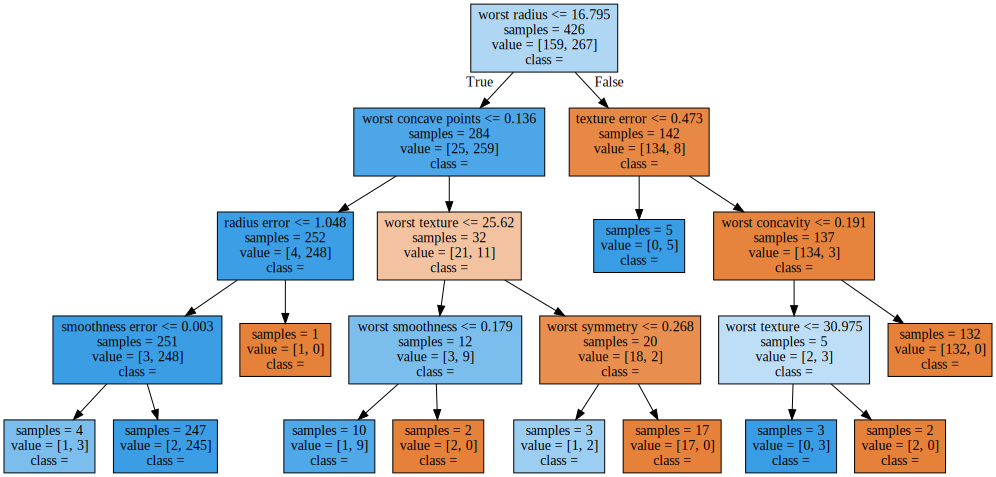

In [55]:
import graphviz

with open("tree.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [61]:
#samples 각 노드에 있는 샘플의 수, value는 클래스 당 각 샘플의 수
#worst radius > 16.795 를 첫번째 노드의 오른쪽것임(0과 1 분류)
#radius 가 16.795 인 것 중에, 악성 샘플이 134개 (=0), 양성 샘플이 8개 (=1) 노드를 만듦.
#이 방향의 트리 나머지 이 8개의 양성 샘플을 더 세부적으로 분리함. 첫 노드에서 오른쪽으로 분리된
#142개 샘플 중, 거의 대부분 (132) 이 가장 오른쪽 노드로 감.

#루트 노드에서 왼쪽으로 간 데이터 즉, worst radius < 16.795 인 데이터는 악성이 25개이고
#양성이 259개임. 대부분의 양성 샘플은 왼쪽에서 두 번째 노드에 할당되고, 나머지 리프 노드 대부분은 매우 적은 샘플을 가짐

#### 트리의 특성 중요도

In [62]:
#트리 작동 요약 속성 파악
#가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 '특성 중요도' 임
#0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이며, 1은 완벽하게 타깃 클래스를 예측했다는 뜻임
#특성 중요도의 전체 합은 1임.

In [63]:
print("특성 중요도 :\n", tree.feature_importances_)

특성 중요도 :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [64]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [65]:
#특성 중요도도 시각화 가능

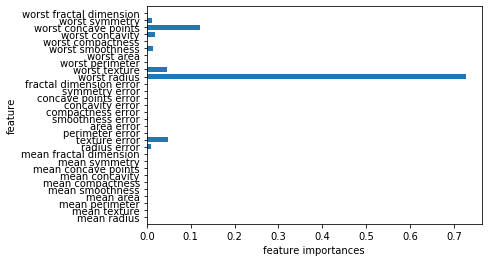

In [67]:
def plot_feature_importances_cancer(model) :
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [68]:
#첫째 노드에 사용된 특성 WORST RADIUS가 가장 중요한 특성으로 사용됨.
#이 그래프는 첫번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 우리의 관찰을 뒷받침해줌
#그러나, 어떤 특성의 feature_importance_ 값이 낮다고 해서 유용하지 않다는 뜻은 아님.
#단지, DF가 특성을 선택하지 않았을 뿐이며, 다른 특성이 동일한 정보를 지니고 있어서 있을 수도 있음.

#선형 모델 계수와 달리 특성 중요도는 항상 야웃이며, 특성이 어떤 클래스를 지지하는지는 알 수 없음.
#WORST RADIUS가 중요하다고 알려주지만, 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없음.
#특성과 클래스 사이에는 간단하지 않은 관계가 있을수도 있다. -> 예시 참고

Feature importances: [0. 1.]


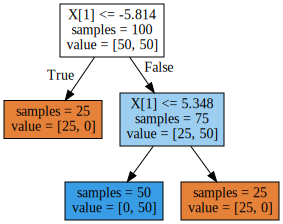

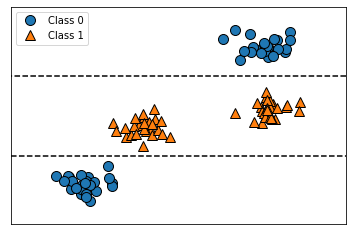

In [69]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [70]:
#해석
# 2개의 특성과 2개의 클래스를 가진 데이터셋을 보여주고 있음
#X[1] 에 있는 정보만 사용하였고, X[0]은 전혀 사용되지 않음. 하지만, X[1] 과 출력 클래스와의 관계는 단순하게 비례
#또는 반비레 하지 않음. 즉, X[1] 값이 높으면 클래스 0이고, 값이 낮으면 1이라고 말할수가 없다.(분류의 판단기준 X)

In [71]:
#DecisionTreeRegressor 회귀 결정 트리에도 비슷하게 적용됨.
#DTR 또는 다른 트리 기반 회귀 모델은 '와삽(extrapolation)' 훈련 데이터의 범위 밖 포인트에 대해 예측 불가함.